In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image 
import time
from skimage import io
from skimage.morphology import convex_hull_image
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from PIL import Image 
import coremltools 
import serial
import os
model = coremltools.models.MLModel('../Model/CCNC.mlmodel')

In [2]:
cap=cv2.VideoCapture(0)
time.sleep(3)

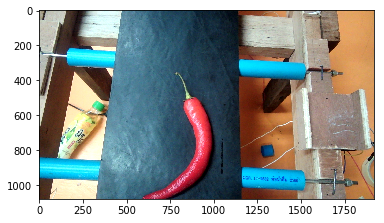

In [26]:
ret, frame = cap.read()
frame=frame[...,::-1]
frame=np.rot90(frame, 0, )
plt.imshow(frame)
plt.show()

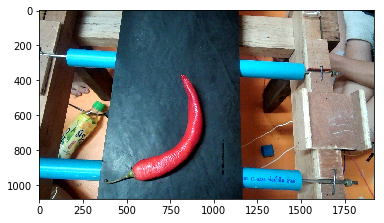

In [14]:
frame=frame[:,:]
plt.imshow(frame)
plt.show()

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


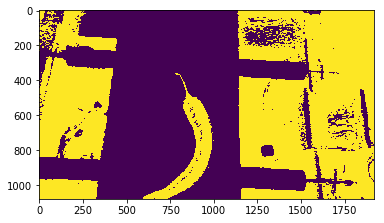

In [30]:
binary=((((frame[:,:,0]/frame[:,:,2])+(frame[:,:,1]/frame[:,:,2]))>2.1)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]<=700))

plt.imshow(binary)
plt.show()

Deleting noise 270
Object area :  65068


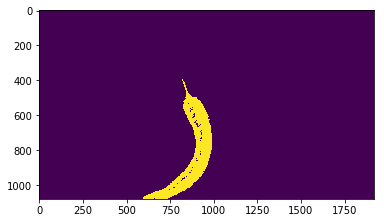

In [31]:
labelframe=label(binary)
regiongrframe=regionprops(labelframe)
labelreal=-1
yreal=0
minr, minc, maxr, maxc=0,0,0,0
for j in range(len(regiongrframe)):
    area=regiongrframe[j].area
    y0,x0=regiongrframe[j].centroid
    if area<30000:
        pass
    elif(y0>yreal and abs(750-x0)<=300):
        labelreal= regiongrframe[j].label
        yreal=y0
        minr, minc, maxr, maxc = regiongrframe[j].bbox
    
print("Deleting noise",labelreal)
    
binary=(labelframe==labelreal)
print("Object area : ",np.sum(binary))
plt.imshow(binary)
plt.show()

Cam!
Cam've got shot!


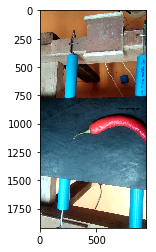

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


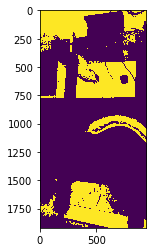

Start find the nearest chillie.
Deleting noise 472
Cropping photo :  1632 0 1818 140
check4
Detecting tail


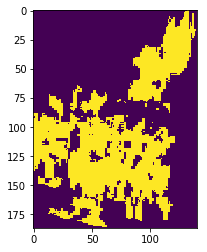

tail pixel :  9497
Start scope for blen.
Calculate blend using convex (1, 1)


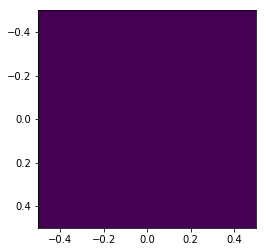

pixel :  0
------>it green


/Users/macbook/anaconda3/lib/python3.7/site-packages/skimage/morphology/convex_hull.py:53: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  "Returning empty image", UserWarning)


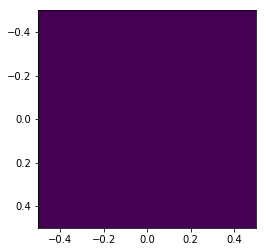

Transforme background to white
Calculating colour.


/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:109: RuntimeWarning: invalid value encountered in long_scalars


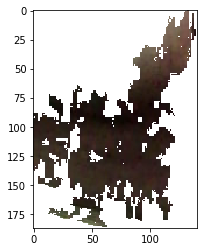

------>chilie colour not good green
donee


In [32]:
#print(waitforreq)
#print("Requset code : ",waitforreq[0])
#if (waitforreq[0]!=50):
#    continue
ret=False
while (ret==False):
    print("Cam!")
    ret, frame = cap.read() # ret is boolean for pic avalble or not
        
print("Cam've got shot!")

frame=frame[...,::-1] # cv2 BRG to RGB
frame=np.rot90(frame, 1, )
frame=frame[:,66:1005]
plt.imshow(frame)
plt.show()

#grayframe=rgb2gray(frame)
#binary=(grayframe>0.4)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]>20)
#binary= cv2.adaptiveThreshold(grayframe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

binary=((((frame[:,:,0]/frame[:,:,2])+(frame[:,:,1]/frame[:,:,2]))>2.5)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]<=700))

plt.imshow(binary)
plt.show()
labelframe=label(binary)
regiongrframe=regionprops(labelframe)

print("Start find the nearest chillie.")

labelreal=-1
yreal=0
minr, minc, maxr, maxc=0,0,0,0
for j in range(len(regiongrframe)):
    area=regiongrframe[j].area
    y0,x0=regiongrframe[j].centroid
    if area<9000:
        pass
    elif(y0>yreal):
        labelreal= regiongrframe[j].label
        yreal=y0
        minr, minc, maxr, maxc = regiongrframe[j].bbox
if(labelreal==-1):
    print("nodetection")
print("Deleting noise",labelreal)

binary=(labelframe==labelreal)
frame[:,:,0]=frame[:,:,0]*binary
frame[:,:,1]=frame[:,:,1]*binary
frame[:,:,2]=frame[:,:,2]*binary

print("Cropping photo : ",minr,minc, maxr, maxc)
binary=binary[minr:maxr+1,minc:maxc+1]
frame=frame[minr:maxr+1,minc:maxc+1,:]

print("check4")
R=frame[:,:,0]
G=frame[:,:,1]
B=frame[:,:,2]
#meanofrgb=(R+G+B)/1.65
print("Detecting tail")
biforblen=(binary&(R>G*1.8)).copy()

plt.imshow(biforblen!=binary)
plt.show()
print("tail pixel : ",np.sum(biforblen!=binary))
if (np.sum(biforblen!=binary)<2000):
    print("No tail detected")
    #command=str.encode('0')
    #ser.write(command)
    #continue

labelframeforblen=label(biforblen)
regiongrframeforblen=regionprops(labelframeforblen)

print("Start scope for blen.")

labelrealforblen=-1
yrealforblen=0
minr, minc, maxr, maxc=0,0,0,0
for j in range(len(regiongrframeforblen)):
    area=regiongrframeforblen[j].area
    y0,x0=regiongrframeforblen[j].centroid
    if area<9000:
        pass
    elif(y0>yrealforblen):
        labelrealforblen= regiongrframeforblen[j].label
        yrealforblen=y0
        minr, minc, maxr, maxc = regiongrframeforblen[j].bbox  
        
biforblen=biforblen[minr:maxr+1,minc:maxc+1]

print("Calculate blend using convex" ,biforblen.shape )
plt.imshow(biforblen)
plt.show()
print("pixel : ",np.sum(biforblen))
if (np.sum(biforblen)<=43000):
    print("------>it green")

try :
    cvh=convex_hull_image(biforblen)
except:
    print("!!!!!!!convexhull not working!")
    cvh=biforblen

plt.imshow(cvh)
plt.show()

if (np.sum(biforblen)*100/np.sum(cvh)<65):
    #return false
    print("------>No it's blend : ",np.sum(biforblen)*100/np.sum(cvh))
    #command=str.encode('0')
    #ser.write(command)
    #continue

print("Transforme background to white")
frame[(R+G+B)==0]=255
img=Image.fromarray(frame)
print("Calculating colour.")
plt.imshow(frame)
plt.show()
predict=model.predict({'image': img})['classLabel']
if(predict=='red' or predict=='yellow'):
    #return true
    print("------>Good chilie")
    #command=str.encode('1')
    #ser.write(command)
else:
        #return false
    print("------>chilie colour not good",predict)
    #command=str.encode('0')
    #ser.write(command)
print("donee")

Cam!
Cam've got shot!


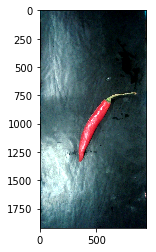

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


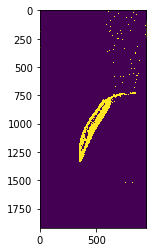

Start find the nearest chillie.
Deleting noise 638
Cropping photo :  735 338 1336 766
check4
Detecting tail


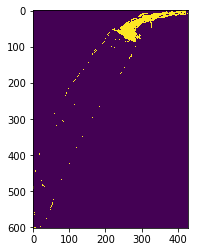

Calculate blend using convex (602, 429)


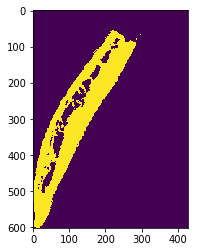

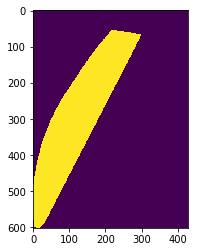

Transforme background to white
Calculating colour.


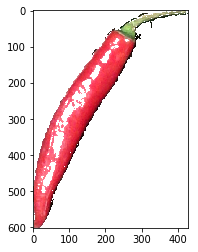

Good chilie
donee


In [61]:
#print(waitforreq)
#print("Requset code : ",waitforreq[0])
#if (waitforreq[0]!=50):
#    continue
ret=False
while (ret==False):
    print("Cam!")
    ret, frame = cap.read() # ret is boolean for pic avalble or not
        
print("Cam've got shot!")

frame=frame[...,::-1] # cv2 BRG to RGB
frame=np.rot90(frame, 1, )
frame=frame[:,66:1005]
plt.imshow(frame)
plt.show()

#grayframe=rgb2gray(frame)
#binary=(grayframe>0.4)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]>20)
#binary= cv2.adaptiveThreshold(grayframe, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

binary=((((frame[:,:,0]/frame[:,:,2])+(frame[:,:,1]/frame[:,:,2]))>2.5)&(frame[:,:,0]+frame[:,:,1]+frame[:,:,2]<=700))

plt.imshow(binary)
plt.show()
labelframe=label(binary)
regiongrframe=regionprops(labelframe)

print("Start find the nearest chillie.")

labelreal=-1
yreal=0
minr, minc, maxr, maxc=0,0,0,0
for j in range(len(regiongrframe)):
    area=regiongrframe[j].area
    y0,x0=regiongrframe[j].centroid
    if area<6000:
        pass
    elif(y0>yreal):
        labelreal= regiongrframe[j].label
        yreal=y0
        minr, minc, maxr, maxc = regiongrframe[j].bbox

print("Deleting noise",labelreal)

binary=(labelframe==labelreal)
frame[:,:,0]=frame[:,:,0]*binary
frame[:,:,1]=frame[:,:,1]*binary
frame[:,:,2]=frame[:,:,2]*binary

print("Cropping photo : ",minr,minc, maxr, maxc)
binary=binary[minr:maxr+1,minc:maxc+1]
frame=frame[minr:maxr+1,minc:maxc+1,:]

print("check4")
R=frame[:,:,0]
G=frame[:,:,1]
B=frame[:,:,2]
#meanofrgb=(R+G+B)/1.65
print("Detecting tail")
biforblen=(binary&(R>G*1.8)).copy()

plt.imshow(biforblen!=binary)
plt.show()

if (np.sum(biforblen!=binary)<100):
    print("No tail detected")
    #command=str.encode('0')
    #ser.write(command)
    #continue

print("Calculate blend using convex" ,biforblen.shape )
plt.imshow(biforblen)
plt.show()
if (np.sum(biforblen)<=100):
    print("it green")

cvh=convex_hull_image(biforblen)

plt.imshow(cvh)
plt.show()

if (np.sum(biforblen)*100/np.sum(cvh)<65):
    #return false
    print("No it's blend : ",np.sum(biforblen)*100/np.sum(cvh))
    #command=str.encode('0')
    #ser.write(command)
    #continue

print("Transforme background to white")
frame[(R+G+B)==0]=255
img=Image.fromarray(frame)
print("Calculating colour.")
plt.imshow(frame)
plt.show()
predict=model.predict({'image': img})['classLabel']
if(predict=='red'):
    #return true
    print("Good chilie")
    #command=str.encode('1')
    #ser.write(command)
else:
        #return false
    print("chilie colour not good",predict)
    #command=str.encode('0')
    #ser.write(command)
print("donee")

In [153]:

cap.release()
cv2.destroyAllWindows()

